In [9]:
import pandas as pd                     # For data processing
import numpy as np                      # For arrays
import matplotlib.pyplot as plt         # For plotting of data

In [10]:
import os 
import tarfile
download_url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
download_path="datasets/housing"
file_path="datasets/housing/housing.tgz"

In [11]:
from six.moves import urllib
if not os.path.isdir(download_path):
    os.makedirs(download_path)
    urllib.request.urlretrieve(download_url,"datasets/housing/housing.tgz")
housing_tgz=tarfile.open(file_path)
housing_tgz.extractall(path="datasets/housing")
housing_tgz.close()

In [12]:
housing_data=pd.read_csv(os.path.join(download_path,"housing.csv"))

In [13]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230E5A0D080>,
      dtype=object)

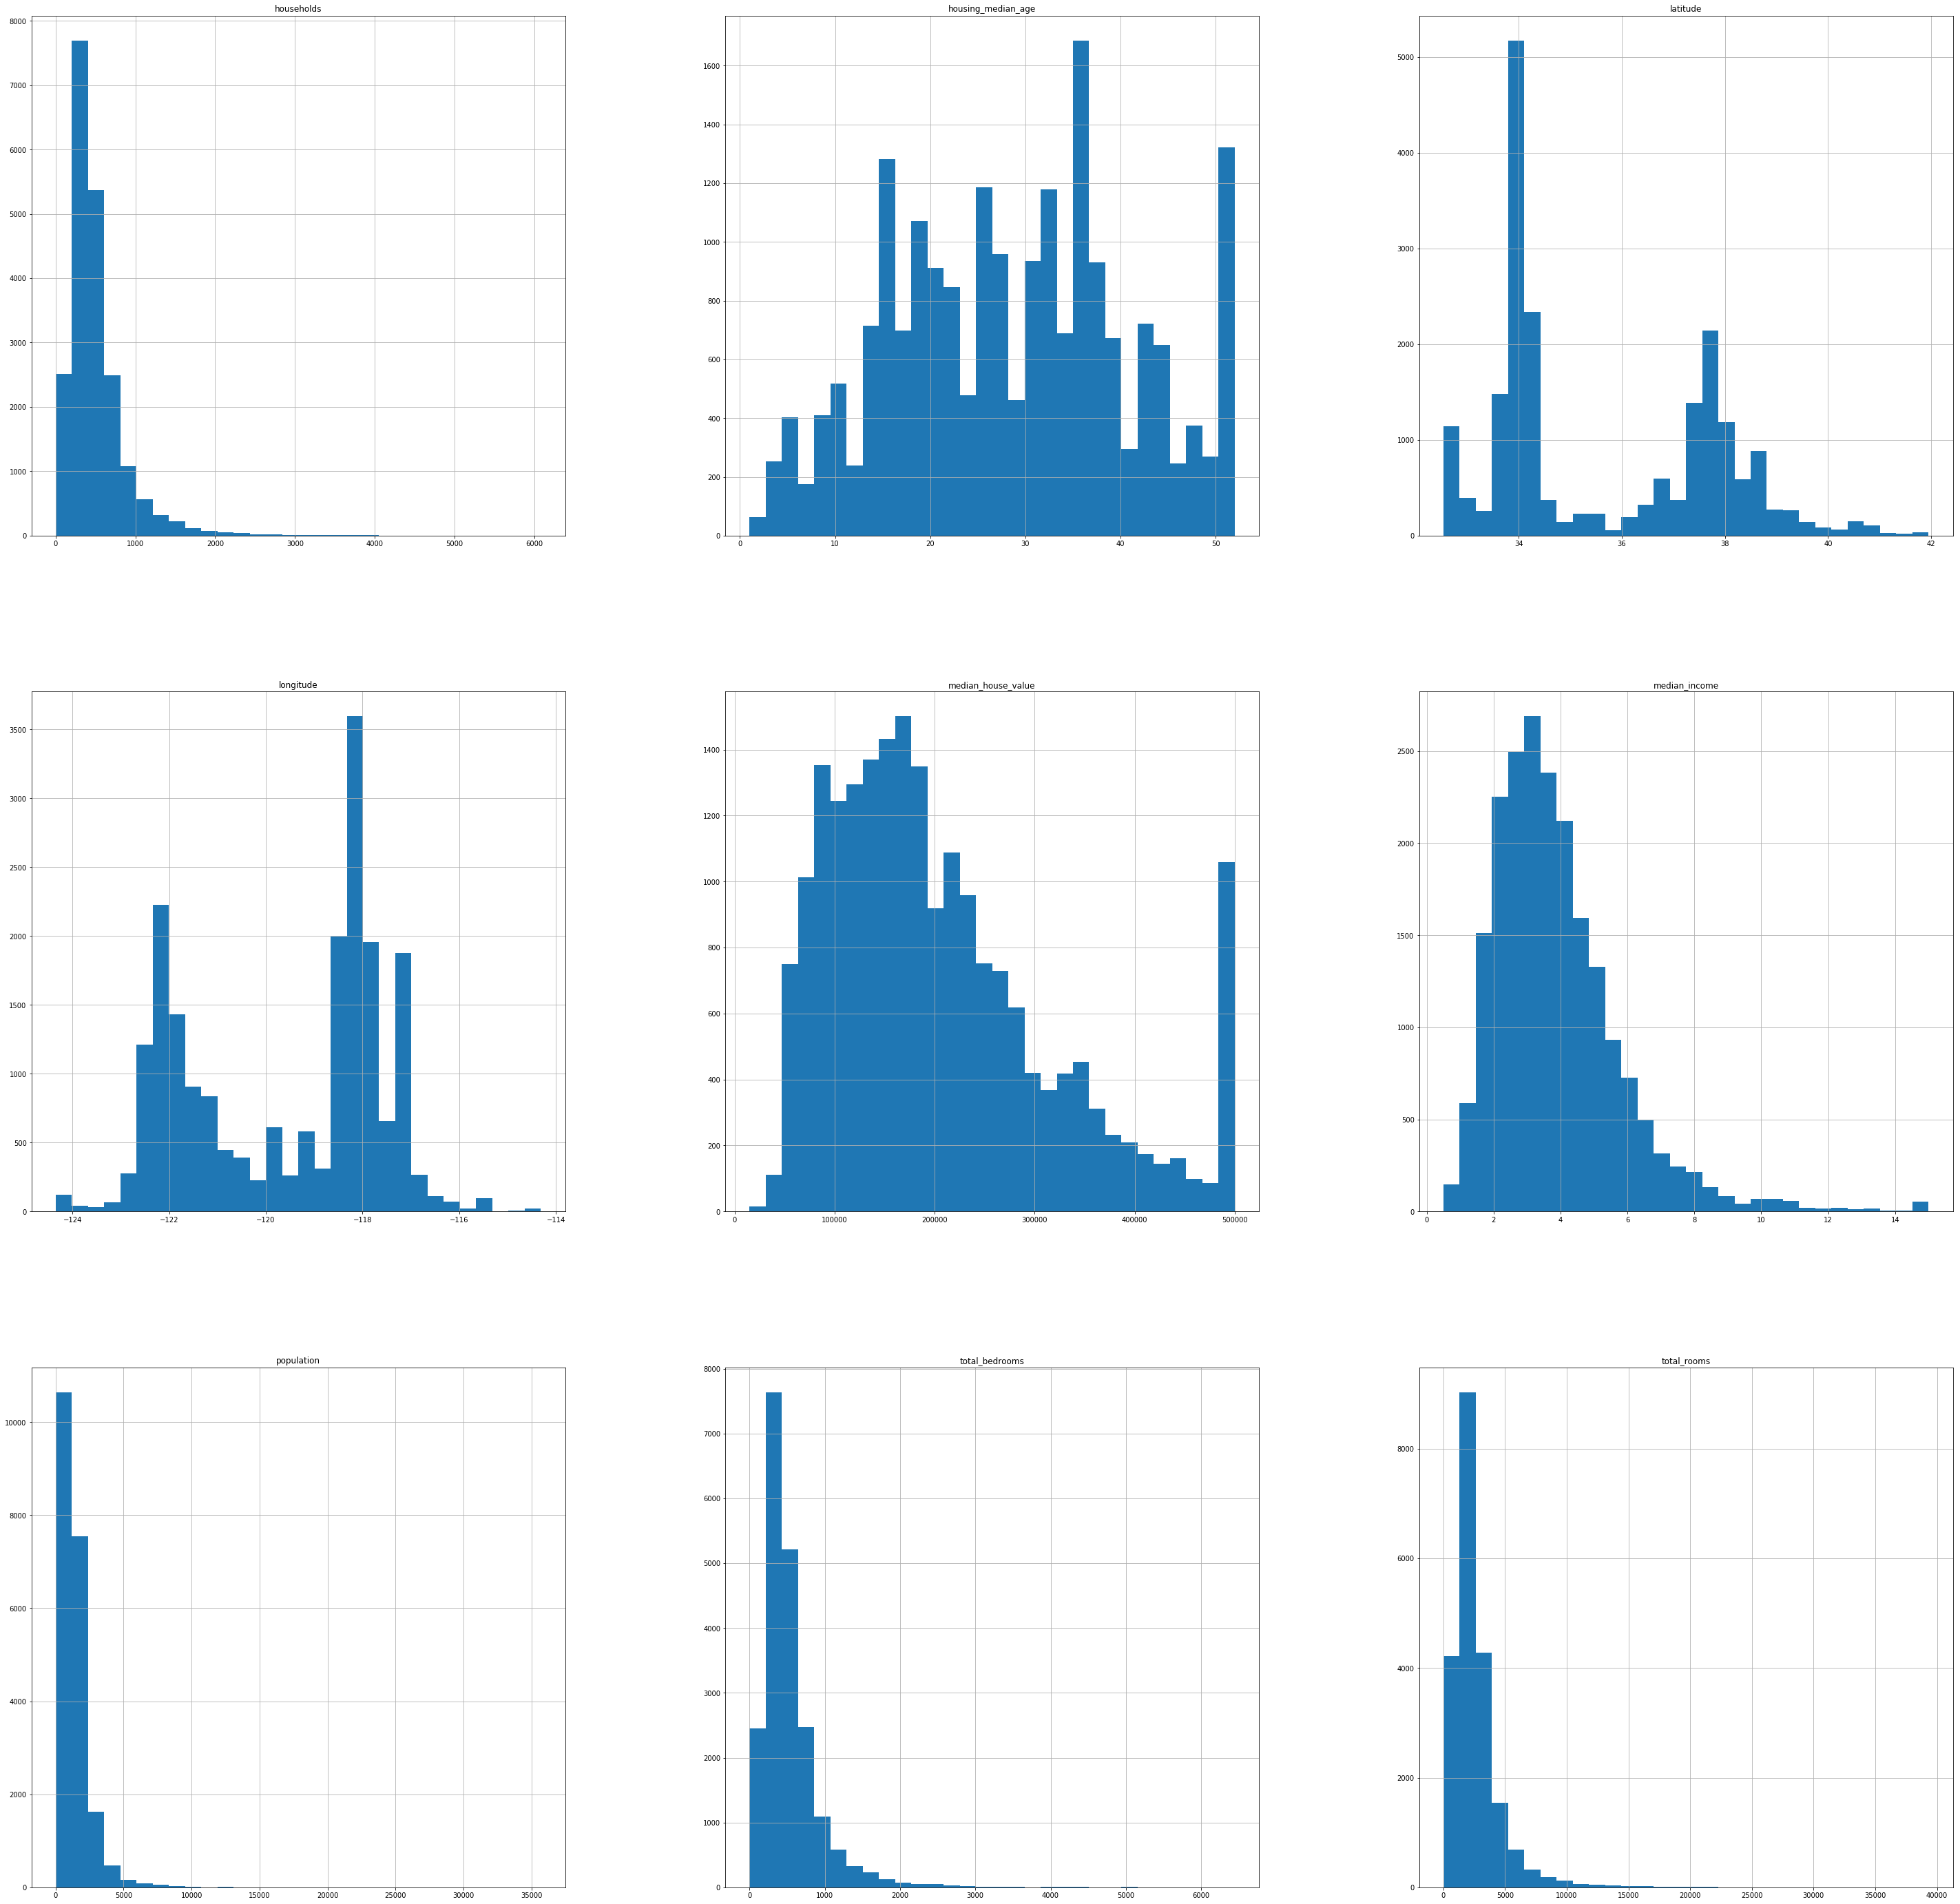

In [16]:
housing_data.hist(bins=30,figsize=(50,50))

In [17]:
housing_data["total_bedrooms"].count()

20433

In [18]:
for x in range(housing_data.count().max()):
    if np.isnan(housing_data["total_bedrooms"][x]):
        print(x)

290
341
538
563
696
738
1097
1350
1456
1493
1606
2028
2115
2301
2323
2334
2351
2412
2420
2578
2608
2647
2826
3024
3328
3354
3376
3482
3485
3529
3721
3778
3912
3921
3958
4043
4046
4186
4279
4309
4391
4447
4496
4591
4600
4629
4667
4691
4738
4743
4744
4767
4852
5059
5216
5222
5236
5654
5665
5678
5723
5751
5990
6052
6068
6220
6241
6253
6298
6421
6541
6590
6814
6835
6962
7097
7113
7168
7191
7228
7316
7330
7547
7654
7668
7763
7806
8337
8383
8530
8915
9149
9571
9620
9622
9814
9845
9877
9942
9970
10033
10216
10236
10385
10389
10428
10495
10761
10885
10915
11096
11311
11351
11441
11449
11512
11741
12101
12414
12570
12809
13015
13069
13311
13332
13336
13597
13656
13706
13925
13932
13933
14015
14152
14173
14307
14331
14386
14462
14521
14641
14930
14970
14986
15030
15060
15118
15137
15397
15479
15607
15663
15890
15975
16025
16038
16104
16105
16330
16757
16879
16880
16885
17041
17198
17202
17639
17825
17840
17923
17928
17973
18177
18246
18261
18332
18346
18466
18786
18873
18914
19060
19071
19122
19

In [19]:
# median_total_bedrooms=hhousing_data["total_bedrooms"].median()
# housing_data["total_bedrooms"].fillna(median_total_bedrooms)
# housing_data=housing_data.dropna()
housing_data.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [20]:
housing_data["total_bedrooms"].isnull().unique()

array([False,  True])

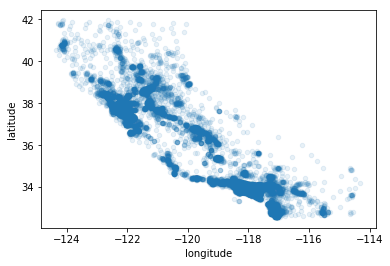

In [21]:
housing_data.plot(kind="scatter",y='latitude',x='longitude',alpha=.1)

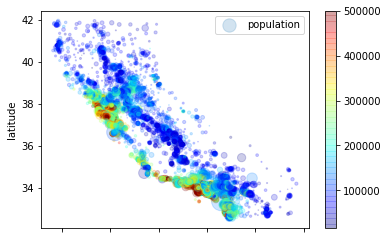

In [22]:
housing_data.plot(kind='scatter',x='longitude',y='latitude',alpha=.2,
             s=housing_data["population"]/100,label="population",
             c=housing_data["median_house_value"],
             cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [23]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
